# Topic 1 Overview of Machine Learning and Tensorflow

In [0]:
# !pip install tensorflow-gpu==2.0.0 --upgrade

In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0-rc2'

In [0]:
# tf.executing_eagerly()

True

In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

### Set random seed (Optional)

In [0]:
# # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
# import os
# os.environ['PYTHONHASHSEED']=str(SEED)

# # 2. Set `python` built-in pseudo-random generator at a fixed value
# from random import seed
# seed(SEED)

# # 3. Set `numpy` pseudo-random generator at a fixed value
# import numpy as np
# np.random.seed(SEED)

# # 4. Set `tensorflow` pseudo-random generator at a fixed value
# from tensorflow import random
# random.set_seed(SEED)

# Topic 2 Basic Tensorflow Operations

In [0]:
a = [1, 1, 1]
b = [1, 1, 1]
# a-b

In [0]:
a1 = tf.constant(a)
b1 = tf.constant(b)
a1-b1

<tf.Tensor: id=2, shape=(3,), dtype=int32, numpy=array([0, 0, 0], dtype=int32)>

## Tensor and Constant

In [0]:
a = tf.constant(4)
a

<tf.Tensor: id=3, shape=(), dtype=int32, numpy=4>

In [0]:
b = tf.constant(5.6)
b

<tf.Tensor: id=4, shape=(), dtype=float32, numpy=4.5>

In [0]:
# a*b

In [0]:
a = tf.constant(4, dtype=tf.float32)
a

<tf.Tensor: id=5, shape=(), dtype=float32, numpy=4.0>

In [0]:
a*b

<tf.Tensor: id=6, shape=(), dtype=float32, numpy=18.0>

In [0]:
a = tf.constant([1,1,1], dtype=tf.float32)
b = tf.constant([2,2,2], dtype=tf.float32)
a-b

<tf.Tensor: id=9, shape=(3,), dtype=float32, numpy=array([-1., -1., -1.], dtype=float32)>

In [0]:
a = tf.constant([1,5])
a.numpy()

array([1., 1., 1.], dtype=float32)

## Matrix

In [0]:
a = tf.constant([[1,2],
                 [3,4]])
b = tf.constant([[5,6],
                 [7,8]])
c = tf.matmul(a,b)
c

<tf.Tensor: id=12, shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

In [0]:
a*b # element-wise multiplication

<tf.Tensor: id=9, shape=(2, 2), dtype=int32, numpy=
array([[ 5, 12],
       [21, 32]], dtype=int32)>

## Exercise: Matrix

In [0]:
x = tf.constant([[1,2]]) # 1*2
w = tf.constant([[1,2],[3,4]]) # 2*2
b = tf.constant([[3,5]]) #1*2
y = tf.matmul(x,w)+b
y

<tf.Tensor: id=17, shape=(1, 2), dtype=int32, numpy=array([[10, 15]], dtype=int32)>

In [0]:
tf.matmul(x,w) # matrix multiplication

<tf.Tensor: id=151, shape=(1, 2), dtype=float32, numpy=array([[ 7., 10.]], dtype=float32)>

In [0]:
x*w # element-wise multiplication (dot product)

<tf.Tensor: id=152, shape=(2, 2), dtype=float32, numpy=
array([[1., 4.],
       [3., 8.]], dtype=float32)>

In [0]:
tf.multiply(x, w) # element-wise multiplication

<tf.Tensor: id=153, shape=(2, 2), dtype=float32, numpy=
array([[1., 4.],
       [3., 8.]], dtype=float32)>

## Variable

In [0]:
a = tf.Variable(2.0)

In [0]:
a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [0]:
# Method 1
a.assign_add(2.2)
a.numpy()

4.2

In [0]:
a.assign_add(2.2)
a.numpy()

6.3999996

In [0]:
a.assign_sub(1)
a.numpy()

5.3999996

In [0]:
# Method 2
a.assign(a * 2)
a.numpy()

4.0

In [0]:
a = tf.Variable(tf.zeros((2,2)))
a

array([[0., 0.],
       [0., 0.]], dtype=float32)

## Gradient

In [0]:
@tf.function
def f(x):
  return x**3

In [0]:
f(2)

8

In [0]:
# calculate gradient when x = 6
x = tf.Variable(6.0) # determine value of x
with tf.GradientTape() as g:
  y = f(x) # assign formula of y
dy_dx = g.gradient(y,x) # calculate gradient of y regarding x
dy_dx.numpy()  # 3*x^2

108.0

In [0]:
x = tf.constant(2.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = f(x)
dy_dx = g.gradient(y,x)
dy_dx.numpy()  #3*x^2

12.0

## Graph Mode

In [0]:
W = tf.Variable(tf.ones((2,2)),dtype=tf.float32)
b = tf.Variable(tf.zeros((1,2)),dtype=tf.float32)

@tf.function
def nn(x):
  y = tf.matmul(x,W)+b
  return tf.nn.relu(y)

x = tf.constant([[1,0]],dtype=tf.float32)
y = nn(x)
y

<tf.Tensor: id=256, shape=(1, 2), dtype=float32, numpy=array([[1., 1.]], dtype=float32)>

In [0]:
@tf.function
def f(x):
  return x**3

x = tf.Variable(2.0)

with tf.GradientTape() as g:  
 y = f(x)
 
dy_dx = g.gradient(y,x)
dy_dx

<tf.Tensor: id=334, shape=(), dtype=float32, numpy=12.0>

## Other Functions (Optional)

In [0]:
a = tf.constant([1,2,3,4])

In [0]:
tf.argmax(a)

<tf.Tensor: id=353, shape=(), dtype=int64, numpy=3>

In [0]:
tf.reduce_sum(a)

<tf.Tensor: id=358, shape=(), dtype=int32, numpy=10>

In [0]:
tf.reduce_mean(a)

<tf.Tensor: id=360, shape=(), dtype=int32, numpy=2>

In [0]:
a = tf.random.normal([2,3])
a

<tf.Tensor: id=378, shape=(2, 3), dtype=float32, numpy=
array([[-1.4246248 ,  0.02565097, -0.22373931],
       [ 0.9777216 ,  0.63972527,  2.1979625 ]], dtype=float32)>

In [0]:
a = tf.random.uniform([2,3])
a

<tf.Tensor: id=385, shape=(2, 3), dtype=float32, numpy=
array([[0.05837739, 0.714713  , 0.64648116],
       [0.6283643 , 0.66727126, 0.4701059 ]], dtype=float32)>

# Topic 3 Datasets

## MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# trainset: 10year seris.    Testset: Final exam

In [0]:
#numpy array
x_train.shape

(60000, 28, 28)

In [0]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

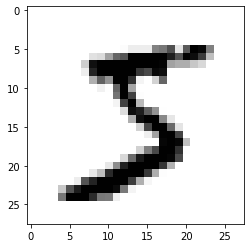

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
#cmap: color mode

In [0]:
# x_train, x_test = x_train / 255.0, x_test / 255.0

# # x_train= x_train / 255.0
# # x_test = x_test / 255.0

In [0]:
y_train.shape

(60000,)

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

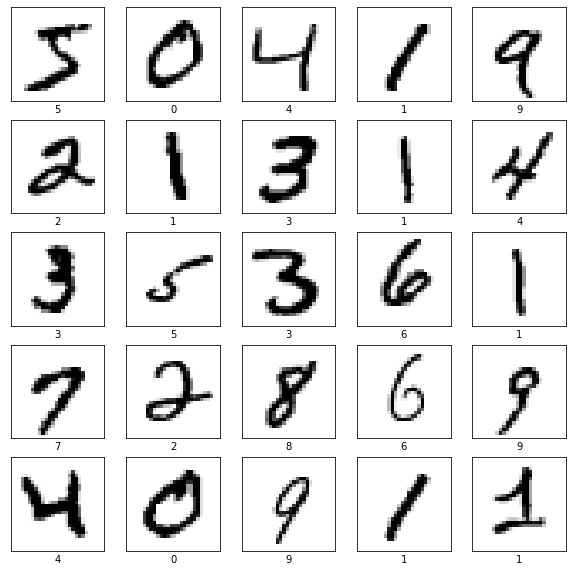

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### One Hot Encoding

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [0]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
y_train.shape

(60000, 10)

## Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

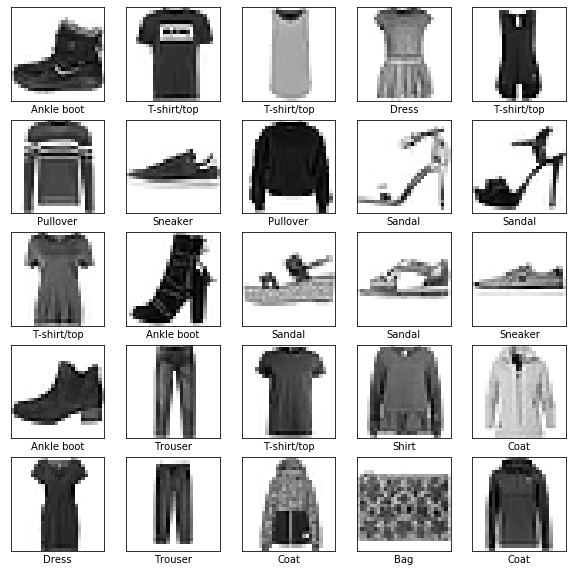

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## CIFAR dataset

In [0]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
x_train[0]

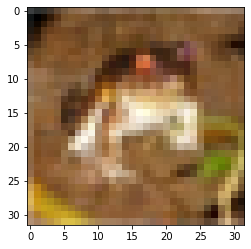

In [0]:
# import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

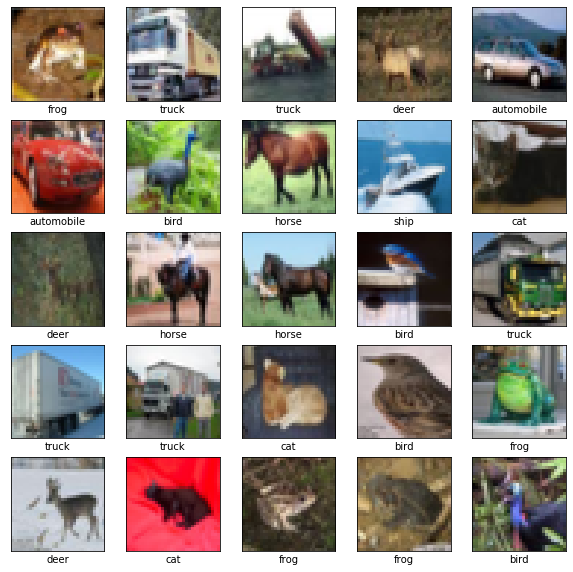

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## IMDB Dataset

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80
batch_size = 32

# Loading data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [0]:
len(x_train), len(x_test)

(25000, 25000)

# Topic 4 Neural Networks for Regression

### Prepare the data

In [0]:
import pandas as pd            
dataset = pd.read_csv("BostonHousing.csv")
dataset # pandas Dataframe

In [0]:
dataset.head()

In [0]:
dataset.describe()

crim          zn       indus  ...           b       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

In [0]:
# Check missing data
dataset.isnull().sum()

In [0]:
# Split the data to train and test dataset
x_train = dataset.sample(frac=0.7, random_state=0) # pseudorandom for reproducibility
x_test = dataset.drop(x_train.index)

In [0]:
x_train.head()

crim   zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
329   0.06724  0.0   3.24     0  0.460  ...  430     16.9  375.21   7.34  22.6
371   9.23230  0.0  18.10     0  0.631  ...  666     20.2  366.15   9.53  50.0
219   0.11425  0.0  13.89     1  0.550  ...  276     16.4  393.74  10.50  23.0
403  24.80170  0.0  18.10     0  0.693  ...  666     20.2  396.90  19.77   8.3
78    0.05646  0.0  12.83     0  0.437  ...  398     18.7  386.40  12.34  21.2

[5 rows x 14 columns]

In [0]:
x_test.head()

crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
9   0.17004  12.5   7.87     0  0.524  ...  311     15.2  386.71  17.10  18.9
11  0.11747  12.5   7.87     0  0.524  ...  311     15.2  396.90  13.27  18.9
23  0.98843   0.0   8.14     0  0.538  ...  307     21.0  394.54  19.88  14.5
25  0.84054   0.0   8.14     0  0.538  ...  307     21.0  303.42  16.51  13.9

[5 rows x 14 columns]

In [0]:
# Create input and output
y_train = x_train.pop('medv')
y_test = x_test.pop('medv')

In [0]:
# Normalize the data
# x_train = (x_train - x_train.mean())/x_train.std()
# x_test = (x_test - x_train.mean())/x_train.std()

# OR
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
x_train.describe()

### Build the model

In [0]:
from tensorflow.keras.models import Sequential # take it as an empty container
from tensorflow.keras.layers import Dense # take it as a layer

In [0]:
x_train.shape[1]

13

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', 
                input_shape=[x_train.shape[1]] )) # first hidden layer
model.add(Dense(64, activation='relu')) # second hidden layer
model.add(Dense(1, activation='linear')) # output layer

# linear: y = x

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# model = Sequential([
#     Dense(64,activation='relu',input_shape=[x_train.shape[1]]),
#     Dense(64,activation='relu'),
#     Dense(1,activation='linear')
# ])

### Visualize the Model

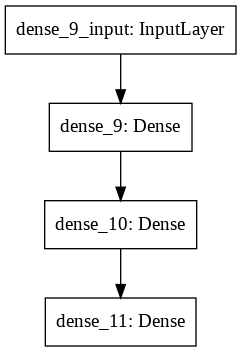

In [0]:
keras.utils.plot_model(model, 'model.png')

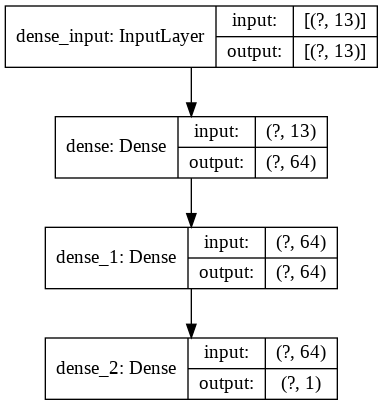

In [0]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [0]:
# model.compile(loss='mse', optimizer='SGD')
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
# compulsory: loss & optimizer
# optional: metrics
# mse --> mean squared error
# mae --> mean absolute error

### Train the model

In [0]:
history = model.fit(x_train, y_train,
                    epochs = 20, 
                    # batch_size = 32, 
                    # shuffle = True, 
                    verbose = 2,      #0: silent, 2: everything
                    validation_data = (x_test,y_test))

### Evaluate the model

In [0]:
history.history

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = list(range(len(loss)))

In [0]:
loss

In [0]:
val_loss

In [0]:
epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

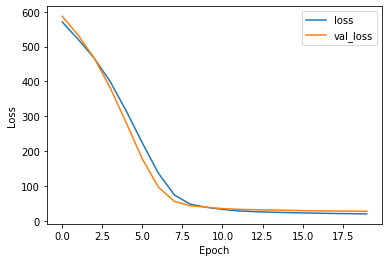

In [0]:
import matplotlib.pyplot as plt
plt.plot(epoch, loss, label='train_loss')
plt.plot(epoch, val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
loss, mae, mse = model.evaluate(x_test, y_test)
loss, mae, mse**0.5 # ==> rmse

152/152 [==============================] - 0s 88us/sample - loss: 26.4498 - mae: 3.3563 - mse: 26.4498


(26.44976776524594, 3.356336, 5.142933799535655)

In [0]:
def multiple_values():
  return 1,2,3

In [0]:
value = multiple_values()
value

(1, 2, 3)

In [0]:
a, b, c = value #unpacking

### Make Prediction

In [0]:
y_pred = model.predict(x_test)
y_pred

In [0]:
y_pred.flatten()

array([31.027979 , 14.245101 , 16.968664 , 15.066432 , 12.797324 ,
       19.006205 , 16.721571 , 11.266643 , 20.153168 , 24.368101 ,
       28.697779 , 35.603714 , 30.906206 , 30.461447 , 17.66912  ,
       14.493922 , 19.273891 , 24.768362 , 30.817802 , 20.782114 ,
       20.192154 , 21.364923 , 28.965302 , 28.503067 , 24.990435 ,
       27.510561 , 24.11864  , 27.640135 , 33.881344 , 28.510975 ,
       18.469042 , 30.062824 , 44.16546  , 37.21459  , 16.98605  ,
       12.2199745, 18.426971 , 14.571003 , 22.70226  , 17.614506 ,
       18.899256 , 21.502764 , 22.69182  , 21.75544  , 14.725639 ,
       13.5606   , 13.279489 , 18.50454  , 46.47783  , 17.90697  ,
       21.670748 , 19.906418 , 24.100847 , 28.045998 , 31.252676 ,
       40.098858 , 33.237312 , 25.687424 , 29.59517  , 34.422867 ,
       34.26002  , 43.401295 , 32.117584 , 25.071957 , 40.73176  ,
       42.166504 , 14.705159 , 19.849993 , 19.70278  , 29.888767 ,
       30.0634   , 19.098715 , 27.458496 , 14.001883 , 26.3355

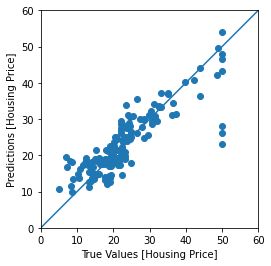

In [0]:
y_pred = model.predict(x_test).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Housing Price]')
plt.ylabel('Predictions [Housing Price]')
plt.axis('square')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60]) #plot a line from (0,0) to (60,60)

### Save the Model in HDF5 Format

In [0]:
model.save("regression.h5")

### Load the Model

In [0]:
new_model = keras.models.load_model('regression.h5')
new_model.predict(x_test)

### Save the Model in SavedModel Format

In [0]:
model.save("regression/housing")

In [0]:
new_model = keras.models.load_model('regression/housing')
new_model.predict(x_test)

## Save the Model to Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
model.save("/content/drive/My Drive/regression/housing")

### Save and Load Weights (Optional)

In [0]:
# Save the weights
model.save_weights('./regression/1/w')

In [0]:
model = Sequential([
    Dense(64,activation='relu',input_shape=[x_train.shape[1]]),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [0]:
# Restore the weights
model.load_weights('./regression/1/w')

In [0]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
loss, mae, mse

152/152 - 0s - loss: 10.8454 - mae: 2.3218 - mse: 10.8454


(10.845427362542404, 2.3217716, 10.8454275)

### Exercise: Predictive Regression Model

In [0]:
import pandas as pd  
dataset = pd.read_csv("iris.csv")
dataset.head()

In [0]:
dataset.pop('Name')
dataset.head()

In [0]:
x_train = dataset.sample(frac=0.7, random_state=0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('SepalWidth')
y_test = x_test.pop('SepalWidth')

In [0]:
# ==> [0,1]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
# x_train.head()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
x_train.shape[1]

3

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [0]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [0]:
# model.summary()

In [0]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    # batch_size = 32, # by default
                    # shuffle=True, # by default
                    validation_data=(x_test,y_test))

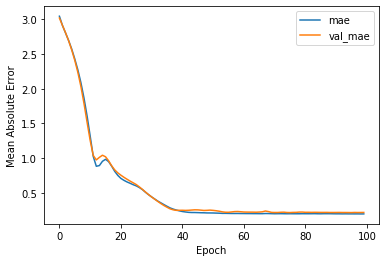

In [0]:
loss = history.history['loss']
val_mae = history.history['val_loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
loss, mae = model.evaluate(x_test, y_test, verbose=1)
loss, mae

45/45 [==============================] - 0s 187us/sample - loss: 0.0818 - mae: 0.2220


(0.08183609479003483, 0.22200106)

In [0]:
y_pred = model.predict(x_test).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Sepal Width]')
plt.ylabel('Predictions [Sepal Width]')
plt.axis('square')
plt.xlim([2,5])
plt.ylim([2,5])
plt.plot([0, 100], [0, 100])

In [0]:
model.save("iris.h5")

# tf.saved_model.save(model, "iris")

In [0]:
new_model = keras.models.load_model('iris.h5')

In [0]:
new_model.summary()

In [0]:
# Predict for a single sample
new_model.predict([[1, 2, 3]])

array([[5.0867968]], dtype=float32)

# Topic 5 Neural Network for Classification

## NN Demo on MNIST dataset

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Every pixel is represented by a number between 0 and 255.  (8 bits --> 2^8)
x_train, x_test = x_train / 255, x_test / 255 # same as MinMaxScaler ==> [0,1]

In [6]:
x_train.shape

(60000, 28, 28)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Accuracy is applicable to comparing the predicted category
# y_true = [1,1,0]
# y_pred = [1,0,0]
# 2/3

In [0]:
history = model.fit(x_train, y_train, 
                    epochs = 10, 
                    validation_data = (x_test,y_test))

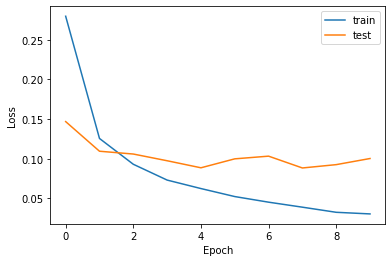

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

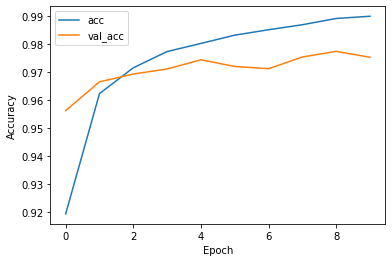

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
loss,acc = model.evaluate(x_test, y_test, verbose=0)

In [28]:
loss,acc = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1003 - accuracy: 0.9754


In [30]:
loss,acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.1003 - accuracy: 0.9754


In [31]:
loss,acc

(0.10031548142433167, 0.9753999710083008)

In [0]:
y_pred = model.predict(x_test)

In [33]:
y_pred

array([[1.74504272e-10, 7.21440463e-09, 6.82947388e-08, ...,
        9.99998569e-01, 1.15728337e-10, 2.74551692e-09],
       [3.15479518e-08, 1.65593157e-08, 1.00000000e+00, ...,
        2.26819879e-13, 2.57317989e-08, 5.35575690e-17],
       [2.30661179e-09, 9.99884963e-01, 8.63895457e-06, ...,
        8.25673633e-05, 2.01096900e-05, 2.06029664e-08],
       ...,
       [6.92056750e-15, 2.07884911e-13, 5.96228186e-16, ...,
        3.61323582e-10, 3.66667079e-11, 1.27205375e-08],
       [1.57948914e-11, 5.36505319e-11, 3.93683041e-15, ...,
        2.51017371e-12, 6.53885138e-07, 1.51136091e-12],
       [7.83320349e-13, 1.31241957e-17, 2.86136878e-11, ...,
        2.03907466e-18, 1.18105033e-16, 4.04714632e-19]], dtype=float32)

In [36]:
import numpy as np
# np.argmax([1, 2, 3, 0])

2

In [37]:
y_pred[0]

array([1.7450427e-10, 7.2144046e-09, 6.8294739e-08, 1.3486190e-06,
       1.4391647e-13, 2.9684841e-11, 5.4442651e-16, 9.9999857e-01,
       1.1572834e-10, 2.7455169e-09], dtype=float32)

In [38]:
np.argmax(y_pred[0])

7

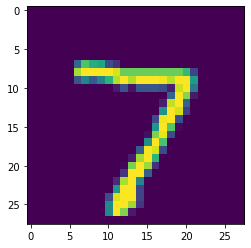

In [39]:
plt.imshow(x_test[0])

In [0]:
# y_pred 2D
np.argmax(y_pred, axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
# 1. h5 format (only readable by Keras)
model.save("mnist.h5")

# 2. SavedModel format
# model.save("/model_mnist/1/")

In [0]:
new_model =keras.models.load_model('mnist.h5')

In [0]:
new_model.summary()

#### Sparse Cross Entropy vs Cross Entropy

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

Using TensorFlow backend.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3103 - accuracy: 0.9085 - val_loss: 0.1645 - val_accuracy: 0.9486
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1380 - accuracy: 0.9581 - val_loss: 0.1253 - val_accuracy: 0.9603
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1012 - accuracy: 0.9693 - val_loss: 0.1056 - val_accuracy: 0.9655
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0803 - accuracy: 0.9751 - val_loss: 0.1009 - val_accuracy: 0.9696
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0983 - val_accuracy: 0.9699
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0938 - val_accuracy: 0.9728
Epoch 7/10
60000/60000 [==============================] 

## Iris Demo

In [0]:
import pandas as pd
dataset_path = "iris.csv"
                     
dataset = pd.read_csv(dataset_path)
dataset.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [0]:
dataset['Name'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Name, dtype: int64

In [0]:
x_train = dataset.sample(frac = 0.7, random_state = 0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('Name')
y_test = x_test.pop('Name')

In [0]:
# print(y_train)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [0]:
y_train[:100]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0])

In [0]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Ex: Classification for Fashsion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
# model.summary()

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4984 - accuracy: 0.8216 - val_loss: 0.4311 - val_accuracy: 0.8454
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3697 - accuracy: 0.8646 - val_loss: 0.3731 - val_accuracy: 0.8610
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8751 - val_loss: 0.3544 - val_accuracy: 0.8708
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8829 - val_loss: 0.3662 - val_accuracy: 0.8644
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.8885 - val_loss: 0.3537 - val_accuracy: 0.8725
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8951 - val_loss: 0.3605 - val_accuracy: 0.8720
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.8989 - val_loss: 0.3643 - val_accuracy:

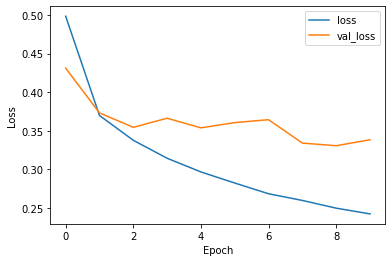

In [70]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

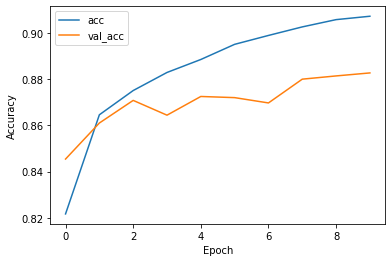

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [72]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

313/313 - 1s - loss: 0.3383 - accuracy: 0.8827


(0.3382531404495239, 0.8827000260353088)

In [73]:
y_pred = model.predict(x_test)
y_pred

array([[8.3095008e-05, 2.9423420e-05, 4.8058710e-06, ..., 2.9980291e-03,
        7.3210799e-06, 9.8199099e-01],
       [4.2467967e-05, 1.8896279e-11, 9.9612671e-01, ..., 3.8876935e-10,
        1.2526688e-10, 3.5745037e-13],
       [1.6017015e-13, 1.0000000e+00, 3.5840626e-11, ..., 2.0206873e-15,
        3.5395512e-15, 3.4113574e-18],
       ...,
       [1.5532113e-04, 8.5748864e-10, 1.5515658e-05, ..., 1.4543307e-10,
        9.9973780e-01, 1.6522096e-09],
       [2.2433078e-09, 9.9999177e-01, 4.2858916e-09, ..., 5.3230155e-12,
        2.0353488e-09, 2.3557389e-12],
       [8.1590675e-05, 3.8019940e-07, 1.7381170e-05, ..., 6.7798269e-04,
        1.4656645e-04, 1.7389659e-05]], dtype=float32)

In [50]:
y_pred[0]

array([3.77792134e-07, 1.69711145e-09, 1.38252441e-08, 1.86543545e-08,
       2.73599251e-11, 8.15998483e-03, 1.01516854e-07, 5.16469590e-03,
       1.62075224e-08, 9.86674845e-01, 5.25632168e-18, 6.73999138e-17,
       3.61606058e-18, 4.95766108e-16, 1.66801665e-17], dtype=float32)

In [51]:
y_pred[0].sum()

1.0

In [52]:
y_pred[0].argmax()

9

In [0]:
import numpy as np
np.array([0, 1, 0, 0.5]).argmax()

1

In [0]:
import numpy as np
np.array([[0, 1, 0, 0.5],
          [0, 1, 2, 0.5]]).argmax(axis = 1)

array([1, 2])

In [0]:
y_pred.argmax(axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
# model.save("classifcation_model_fashion_mnist.h5")

tf.saved_model.save(model, "/model_fashion_mnist")

INFO:tensorflow:Assets written to: /model_fashion_mnist/1/assets


# Topic 6 Convolutional Neural Network (CNN)

## CNN on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [76]:
x_train.shape

(60000, 28, 28)

In [0]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [78]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
# x_train[0]

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize an empty container
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten (Vectorization)
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [81]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_38 (Dense)             (None, 10)              

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=10,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1690 - accuracy: 0.9494 - val_loss: 0.0578 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0540 - accuracy: 0.9830 - val_loss: 0.0565 - val_accuracy: 0.9803
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0383 - accuracy: 0.9874 - val_loss: 0.0373 - val_accuracy: 0.9886
Epoch 4/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0414 - val_accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0329 - val_accuracy: 0.9896
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch 7/10
60000/60000 [=========================

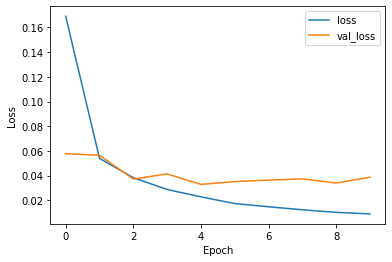

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

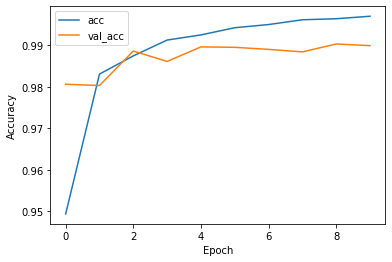

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

10000/1 - 1s - loss: 0.0194 - accuracy: 0.9899


(0.038753630371482585, 0.9899)

In [0]:
y_pred = model.predict(x_test)
y_pred[:10]

array([[3.9419385e-17, 1.1965444e-11, 4.6047957e-10, 1.0861490e-10,
        4.5189787e-14, 7.9731245e-15, 1.9709173e-19, 1.0000000e+00,
        1.1607120e-13, 1.2954601e-10],
       [9.7179296e-13, 2.1543971e-12, 1.0000000e+00, 1.8425212e-20,
        6.3311016e-15, 1.0326425e-20, 1.3620347e-10, 9.8892282e-16,
        5.9480157e-16, 1.0366451e-19],
       [4.6231938e-07, 9.9997473e-01, 3.4534423e-08, 3.8088019e-10,
        3.2781995e-06, 2.3029953e-08, 4.4046922e-09, 1.1178727e-06,
        2.0435453e-05, 4.3616541e-09],
       [9.9995697e-01, 4.4285547e-13, 6.2735700e-13, 4.1373415e-13,
        2.0628520e-15, 1.9748743e-11, 4.2979274e-05, 3.7823735e-15,
        3.4593053e-13, 6.4090516e-10],
       [2.6619776e-12, 4.8049467e-11, 1.4629223e-09, 3.2286307e-13,
        9.9999905e-01, 9.9757160e-13, 1.3707300e-14, 6.3387205e-11,
        5.0101989e-12, 9.4834229e-07],
       [1.7067231e-08, 9.9996853e-01, 4.1601238e-09, 2.1041204e-11,
        1.0340196e-06, 1.6310642e-10, 8.0157977e-11, 2.75

## Ex: CNN on CIFAR dataset

### Import and Normalize data

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
# x_train[0]

### Build the Model

- conv 1 3x3 32 filters with 2x2 max pool
- conv 2 3x3 64 filters with 2x2 max pool
- (flatten)
- fc  - 128 neurons
- fc - softmax output layer


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, 3, activation='relu', padding='same', 
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Train the Model

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=10,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 162us/sample - loss: 1.4148 - accuracy: 0.4942 - val_loss: 1.1100 - val_accuracy: 0.6022
Epoch 2/10
50000/50000 [==============================] - 7s 145us/sample - loss: 1.1049 - accuracy: 0.6090 - val_loss: 0.9680 - val_accuracy: 0.6610
Epoch 3/10
50000/50000 [==============================] - 7s 143us/sample - loss: 0.9772 - accuracy: 0.6532 - val_loss: 0.9371 - val_accuracy: 0.6717
Epoch 4/10
50000/50000 [==============================] - 7s 142us/sample - loss: 0.8929 - accuracy: 0.6860 - val_loss: 0.8968 - val_accuracy: 0.6848
Epoch 5/10
50000/50000 [==============================] - 7s 143us/sample - loss: 0.8251 - accuracy: 0.7101 - val_loss: 0.8195 - val_accuracy: 0.7162
Epoch 6/10
50000/50000 [==============================] - 7s 141us/sample - loss: 0.7731 - accuracy: 0.7287 - val_loss: 0.8264 - val_accuracy: 0.7155
Epoch 7/10
50000/50000 [==========================

### Evaluate the Model

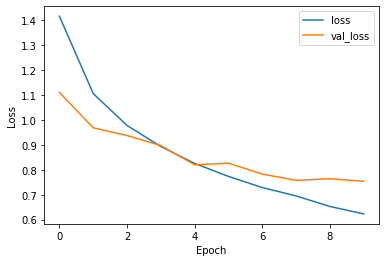

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

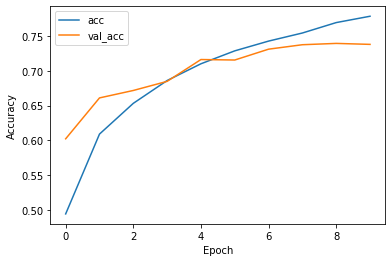

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

10000/1 - 1s - loss: 0.7323 - accuracy: 0.7380


(0.7538966923713684, 0.738)

## CNN on Small Dataset: Cats and Dogs

### Import the data

In [82]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [83]:
path_to_zip

'/root/.keras/datasets/cats_and_dogs_filtered.zip'

In [0]:
PATH = path_to_zip.replace('.zip', '')

In [85]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
# /cats_and_dogs_filtered
#   /train
#     /cats ==> y_train
#       1.jpg
#       2.jpg

#     /dogs ==> y_train
#       1.jpg
#       2.jpg
 

#   /validation
#     /cats ==> y_test
#       1.jpg
#       2.jpg

#     /dogs ==> y_test
#       1.jpg
#       2.jpg

In [0]:
train_dir = PATH + '/train'
validation_dir = PATH + '/validation'

In [88]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

### Image Generator

In [0]:
def generate_even():
  for i in range(10):
    yield i*2

In [0]:
g = generate_even()

In [93]:
next(g)

4

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1/255) 
val_image_generator = ImageDataGenerator(rescale=1/255) 

In [95]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 128

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_data_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

### Visualize the raw images 

In [0]:
batch_images, batch_labels = next(train_data_gen)

In [97]:
batch_labels

array([1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1.], dtype=float32)

In [98]:
batch_images.shape

(128, 150, 150, 3)

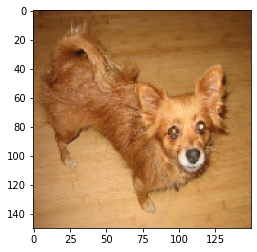

In [99]:
import matplotlib.pyplot as plt
plt.imshow(batch_images[0])

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

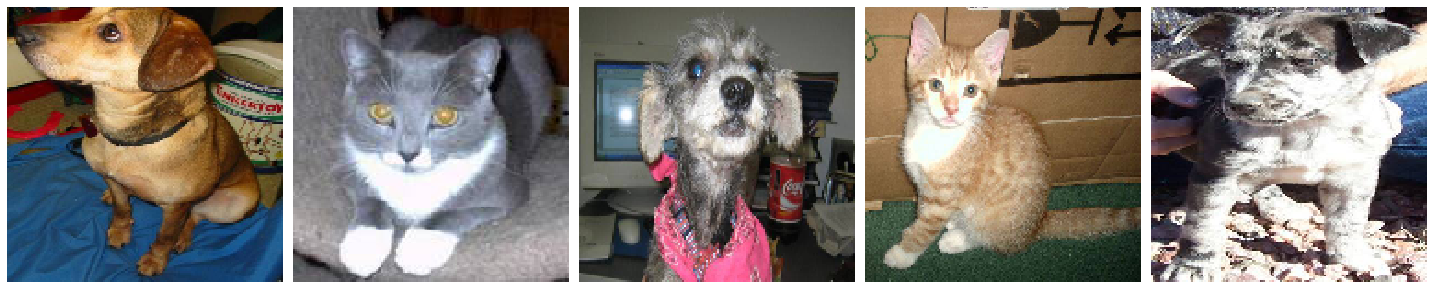

In [0]:
plotImages(batch_images[:5])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', 
                 input_shape = (IMG_HEIGHT, IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(518, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### Train the Model

In [127]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = 2000//BATCH_SIZE,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps = 1000//BATCH_SIZE,
)

Epoch 1/15
15/15 [==============================] - 15s 983ms/step - loss: 0.8330 - accuracy: 0.5000 - val_loss: 0.6886 - val_accuracy: 0.5112
Epoch 2/15
15/15 [==============================] - 15s 1s/step - loss: 0.6943 - accuracy: 0.5069 - val_loss: 0.6891 - val_accuracy: 0.5446
Epoch 3/15
15/15 [==============================] - 15s 970ms/step - loss: 0.6898 - accuracy: 0.5684 - val_loss: 0.6814 - val_accuracy: 0.5190
Epoch 4/15
15/15 [==============================] - 15s 970ms/step - loss: 0.6776 - accuracy: 0.5828 - val_loss: 0.6744 - val_accuracy: 0.5391
Epoch 5/15
15/15 [==============================] - 15s 987ms/step - loss: 0.6738 - accuracy: 0.5796 - val_loss: 0.6457 - val_accuracy: 0.5781
Epoch 6/15
15/15 [==============================] - 15s 976ms/step - loss: 0.6854 - accuracy: 0.5540 - val_loss: 0.6717 - val_accuracy: 0.6295
Epoch 7/15
15/15 [==============================] - 15s 985ms/step - loss: 0.6661 - accuracy: 0.5978 - val_loss: 0.6357 - val_accuracy: 0.6641
Ep

### Evaluate the Model

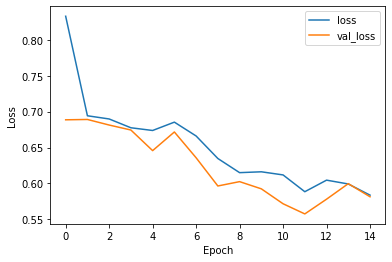

In [128]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

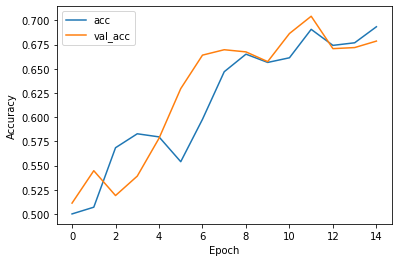

In [129]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Data Augmentation

#### Flipping

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1/255, 
                               horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images= [train_data_gen[0][0][0] for i in range(5)]

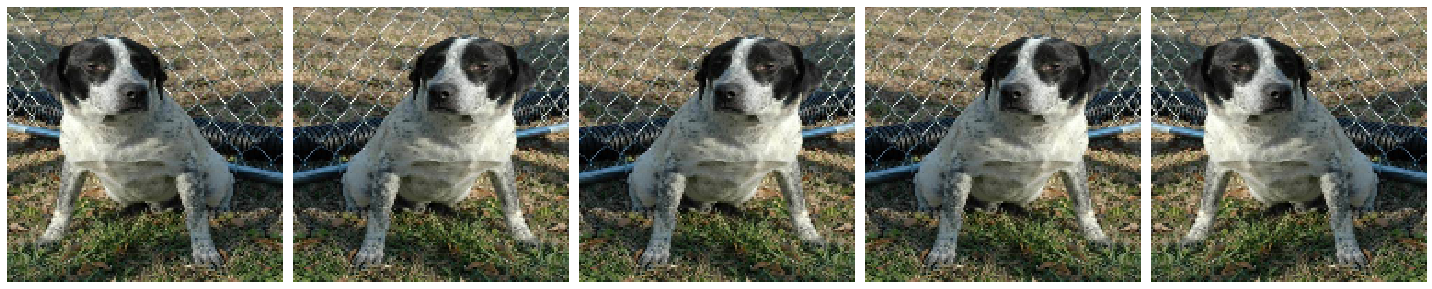

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images[:5])

#### Rotation

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, 
                               rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


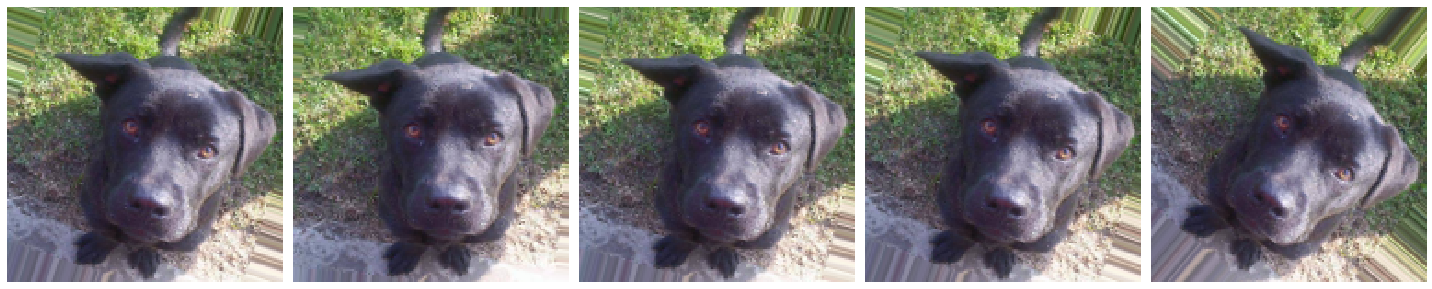

In [0]:
plotImages(augmented_images)

#### Zoom

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, 
                               zoom_range=0.5)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


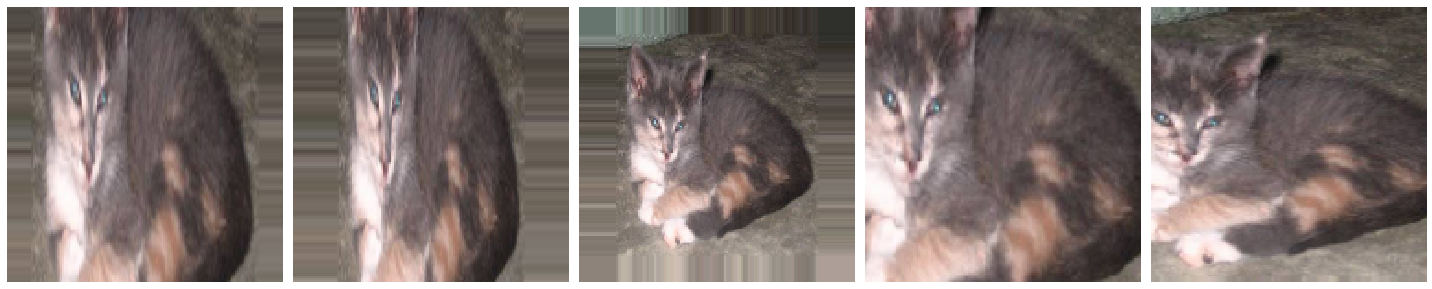

In [0]:
plotImages(augmented_images)

### Applying Data Augumentation

In [0]:
train_image_generator = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
val_image_generator = ImageDataGenerator(rescale=1/255)

In [131]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 128

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', 
                 input_shape = (IMG_HEIGHT, IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [133]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 64)      

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [135]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = 2000//BATCH_SIZE,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps = 1000//BATCH_SIZE,
)

Epoch 1/15
15/15 [==============================] - 15s 989ms/step - loss: 0.7721 - accuracy: 0.5125 - val_loss: 0.6929 - val_accuracy: 0.4978
Epoch 2/15
15/15 [==============================] - 15s 1s/step - loss: 0.6927 - accuracy: 0.5053 - val_loss: 0.6858 - val_accuracy: 0.5335
Epoch 3/15
15/15 [==============================] - 15s 982ms/step - loss: 0.6878 - accuracy: 0.5304 - val_loss: 0.6708 - val_accuracy: 0.5335
Epoch 4/15
15/15 [==============================] - 14s 965ms/step - loss: 0.6684 - accuracy: 0.6063 - val_loss: 0.6260 - val_accuracy: 0.6585
Epoch 5/15
15/15 [==============================] - 15s 1s/step - loss: 0.6449 - accuracy: 0.6250 - val_loss: 0.6420 - val_accuracy: 0.6384
Epoch 6/15
15/15 [==============================] - 15s 1s/step - loss: 0.6600 - accuracy: 0.6058 - val_loss: 0.6339 - val_accuracy: 0.6641
Epoch 7/15
15/15 [==============================] - 15s 1s/step - loss: 0.6425 - accuracy: 0.6357 - val_loss: 0.6009 - val_accuracy: 0.6663
Epoch 8/15


### Evalaute the Model

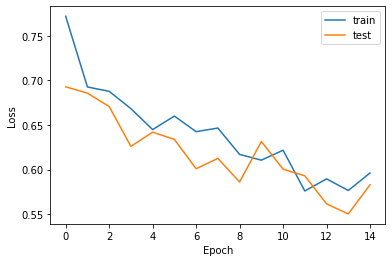

In [136]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

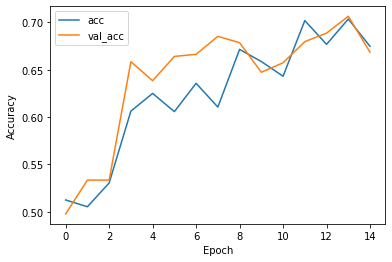

In [137]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Ex: CNN with Dropout

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 179us/sample - loss: 1.5894 - accuracy: 0.4249 - val_loss: 1.3064 - val_accuracy: 0.5382
Epoch 2/10
50000/50000 [==============================] - 8s 167us/sample - loss: 1.2719 - accuracy: 0.5453 - val_loss: 1.1823 - val_accuracy: 0.5958
Epoch 3/10
50000/50000 [==============================] - 8s 166us/sample - loss: 1.1613 - accuracy: 0.5858 - val_loss: 1.0473 - val_accuracy: 0.6394
Epoch 4/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.0892 - accuracy: 0.6121 - val_loss: 1.0300 - val_accuracy: 0.6471
Epoch 5/10
50000/50000 [==============================] - 9s 172us/sample - loss: 1.0455 - accuracy: 0.6282 - val_loss: 0.9843 - val_accuracy: 0.6653
Epoch 6/10
50000/50000 [==============================] - 8s 167us/sample - loss: 1.0023 - accuracy: 0.6442 - val_loss: 0.9791 - val_accuracy: 0.6638
Epoch 7/10
50000/50000 [==========================

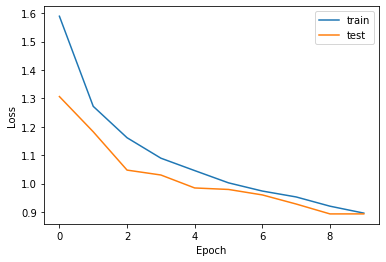

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

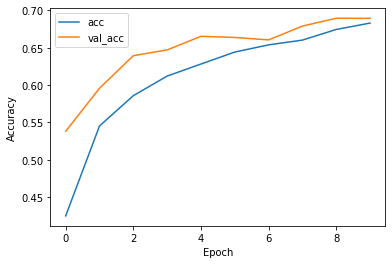

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Topic 8 Transfer Learning & Tensorflow Hub

## Model Demo

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.preprocessing import image

In [0]:
img = image.load_img('bird.png', target_size=(224,224))

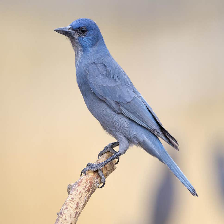

In [0]:
img

In [0]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [0]:
model = VGG16()

553467904/553467096 [==============================] - 41s 0us/step


In [0]:
# model.summary()

In [0]:
# predictions = model.predict(x)

In [0]:
import numpy as np
x = np.expand_dims(x,axis=0)

In [0]:
x.shape

(1, 224, 224, 3)

In [0]:
predictions = model.predict(x)
print(predictions)

In [0]:
classes = decode_predictions(predictions,top=3)
classes

40960/35363 [==================================] - 0s 0us/step


[[('n01796340', 'ptarmigan', 0.66394585),
  ('n01530575', 'brambling', 0.12799448),
  ('n01807496', 'partridge', 0.0460042)]]

## Fine Tuning

### Step 1: Data Augmentation

### Step 2: Pre-Trained Base Model

In [138]:
from tensorflow.keras.applications import MobileNet
base_model=MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


In [139]:
len(base_model.layers)

93

In [140]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [141]:
from tensorflow.keras.applications import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False) #top refers to last few layers

17227776/17225924 [==============================] - 0s 0us/step


In [142]:
len(base_model.layers)

87

In [0]:
# base_model.summary()

### Step 3: Add new layer

In [0]:
# from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
# from tensorflow.keras.models import Model

# x=base_model.output
# x=GlobalAveragePooling2D()(x) # Flatten
# x=Dense(1024,activation='relu')(x) 
# x=Dense(1024,activation='relu')(x) 
# x=Dense(512,activation='relu')(x) 
# preds=Dense(1,activation='sigmoid')(x) 

# model=Model(inputs=base_model.input,outputs=preds)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
# model.summary()

In [144]:
model.layers[-5:]

In [0]:
for layer in model.layers[:-5]:
    layer.trainable=False

# # Optional
# for layer in model.layers[-5:]:
#     layer.trainable=True

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 4,869,057
Trainable params: 1,640,193
Non-trainable params: 3,228,864
______________________________________

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Step 4: Train model

In [150]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_data_gen,
    steps_per_epoch = 2000//BATCH_SIZE,
    epochs=30,
    validation_data=val_data_gen,
    validation_steps = 1000//BATCH_SIZE,# er
    callbacks = [EarlyStopping(monitor='val_loss', 
                               patience=2, 
                               verbose=2, 
                               restore_best_weights = True)]
)

Epoch 1/30
15/15 [==============================] - 16s 1s/step - loss: 0.5029 - accuracy: 0.8045 - val_loss: 0.1602 - val_accuracy: 0.9484
Epoch 2/30
15/15 [==============================] - 16s 1s/step - loss: 0.1878 - accuracy: 0.9225 - val_loss: 0.8213 - val_accuracy: 0.8991
Epoch 3/30
15/15 [==============================] - 16s 1s/step - loss: 0.1641 - accuracy: 0.9276 - val_loss: 0.2875 - val_accuracy: 0.9507
Epoch 00003: early stopping


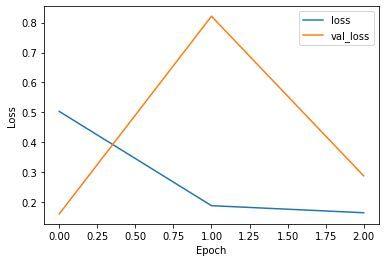

In [151]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [152]:
model.evaluate(val_data_gen, steps = 1000 // BATCH_SIZE)

7/7 [==============================] - 2s 274ms/step - loss: 0.1920 - accuracy: 0.9427


[0.1920233815908432, 0.9426605701446533]

In [0]:
preds = model.predict(val_data_gen, steps = 1000 // BATCH_SIZE)

In [155]:
preds[:10]

array([[7.6469332e-05],
       [6.6713005e-04],
       [5.3657687e-01],
       [3.9879824e-03],
       [9.8991382e-01],
       [2.0827830e-04],
       [1.0000000e+00],
       [9.6577078e-01],
       [8.4244082e-04],
       [9.9999988e-01]], dtype=float32)

In [159]:
# Numpy
preds.round().flatten().astype(int)

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

#### Test the Dog Image

57344/49553 [==================================] - 0s 0us/step


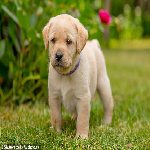

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image1.jpg',
                              'https://i.dailymail.co.uk/1s/2019/11/23/09/21370544-7717313-image-a-1_1574501083030.jpg')
                              # 'https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0
img.shape

(150, 150, 3)

In [0]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [0]:
result = model.predict(img)
result

array([[1.]], dtype=float32)

In [0]:
round(result[0][0])

1.0

#### Test the Cat Image

65536/60717 [================================] - 0s 6us/step


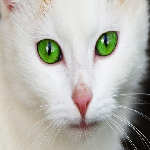

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image10.jpg',
                              # 'https://www.thesprucepets.com/thmb/wd4VS5A5UCHLF0IBG-DsVfrLypk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg')
                              'https://images.all-free-download.com/images/graphicthumb/cat_with_green_eyes_194623.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

In [0]:
result = model.predict(img)
round(result[0][0])

0.0

## Tenssorflow Hub (Optional)

In [0]:
import tensorflow_hub as hub

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 

In [0]:
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url, input_shape=(224,224,3))])

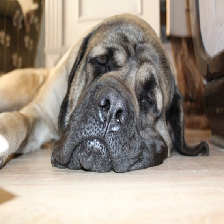

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((224,224))
img

In [0]:
img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

In [0]:
result = classifier.predict(img)
result

array([[ 0.19942084, -0.50989014,  0.4426471 , ...,  0.77951974,
        -0.16284469,  0.7057946 ]], dtype=float32)

In [0]:
predicted_class = np.argmax(result[0])
predicted_class

244

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

Text(0.5, 1.0, 'Prediction: Bull Mastiff')

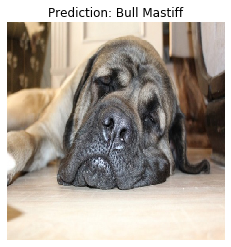

In [0]:
plt.imshow(img[0])
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Prediction: " + predicted_class_name.title())

# Topic 7 Recurrent Neural Network (RNN)

## Text Classifcaiton With RNN

### Load the IMDB dataset

In [160]:
from tensorflow.keras.datasets import imdb

max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [161]:
x_train.shape

(25000,)

In [162]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [0]:
# [len(x) for x in x_train[:10]]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 80
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [0]:
# [len(x) for x in x_train[:10]]

In [165]:
x_train.shape

(25000, 80)

In [166]:
x_train[5]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1,   778,   128,    74,    12,   630,   163,    15,
           4,  1766,  7982,  1051,     2,    32,    85,   156,    45,
          40,   148,   139,   121,   664,   665,    10,    10,  1361,
         173,     4,   749,     2,    16,  3804,     8,     4,   226,
          65,    12,    43,   127,    24, 15344,    10,    10],
      dtype=int32)

In [167]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 128)) # convert a word into a 1D vector to represent the word
model.add(SimpleRNN(256)) # capture sequential relationship of sequential data, and send a final signal to next layer
# model.add(Dense(64, activation = "relu"))
# model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation='sigmoid')) # output probability

In [169]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               98560     
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 257       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(256))
model.add(Dense(1, activation='sigmoid'))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(1, activation='sigmoid'))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(256, return_sequences= True)) # send hidden outputs for every timestep to the next layer
model.add(LSTM(256, return_sequences= True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

### Train the Model

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=15,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.4241 - accuracy: 0.8014 - val_loss: 0.4130 - val_accuracy: 0.8170
Epoch 2/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.2547 - accuracy: 0.8999 - val_loss: 0.3942 - val_accuracy: 0.8384
Epoch 3/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.1639 - accuracy: 0.9385 - val_loss: 0.4794 - val_accuracy: 0.8310
Epoch 4/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.1140 - accuracy: 0.9567 - val_loss: 0.5519 - val_accuracy: 0.8217
Epoch 5/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.0774 - accuracy: 0.9735 - val_loss: 0.6452 - val_accuracy: 0.8205
Epoch 6/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.0518 - accuracy: 0.9827 - val_loss: 0.7315 - val_accuracy: 0.8228
Epoch 7/15
25000/25000 [==============================] 

### Evaluate the Model

In [0]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)
score, acc

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(1.0591298265457154, 0.81304)

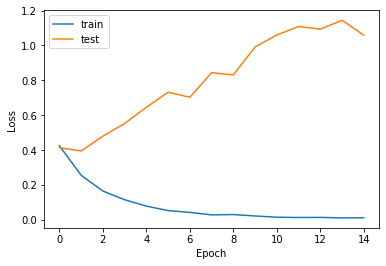

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

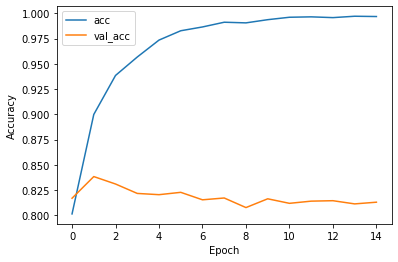

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='train')
plt.plot(epoch,val_acc,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Ex: RNN on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.7323 - accuracy: 0.7529 - val_loss: 0.2687 - val_accuracy: 0.9156
Epoch 2/10
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.2217 - accuracy: 0.9293 - val_loss: 0.1787 - val_accuracy: 0.9452
Epoch 3/10
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.1498 - accuracy: 0.9538 - val_loss: 0.1221 - val_accuracy: 0.9630
Epoch 4/10
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.1198 - accuracy: 0.9624 - val_loss: 0.1020 - val_accuracy: 0.9702
Epoch 5/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.1009 - accuracy: 0.9684 - val_loss: 0.0911 - val_accuracy: 0.9702
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0867 - accuracy: 0.9726 - val_loss: 0.0908 - val_accuracy: 0.9718
Epoch 7/10
60000/60000 [==============================] 

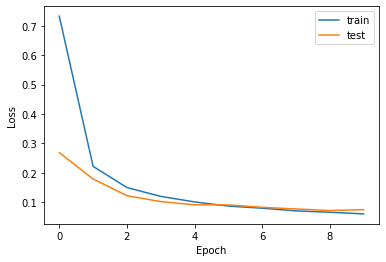

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

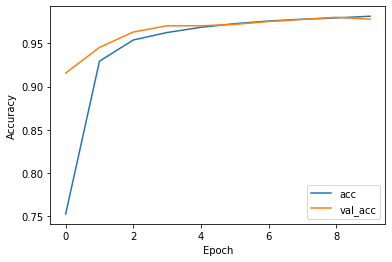

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Stack RNN Architecture

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, activation='relu',input_shape=(28,28),return_sequences=True))
model.add(LSTM(32, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 140s 2ms/sample - loss: 0.5448 - accuracy: 0.8156 - val_loss: 0.1789 - val_accuracy: 0.9431
Epoch 2/10
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.1629 - accuracy: 0.9493 - val_loss: 0.1065 - val_accuracy: 0.9664
Epoch 3/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.1178 - accuracy: 0.9639 - val_loss: 0.0811 - val_accuracy: 0.9765
Epoch 4/10
60000/60000 [==============================] - 140s 2ms/sample - loss: 0.0906 - accuracy: 0.9718 - val_loss: 0.1267 - val_accuracy: 0.9596
Epoch 5/10
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.0782 - accuracy: 0.9760 - val_loss: 0.0725 - val_accuracy: 0.9777
Epoch 6/10
60000/60000 [==============================] - 137s 2ms/sample - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0654 - val_accuracy: 0.9798
Epoch 7/10
60000/60000 [==========================

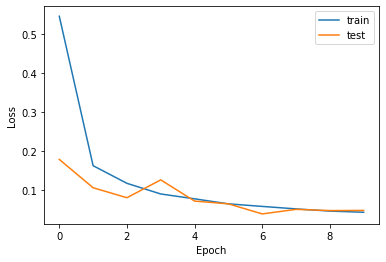

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

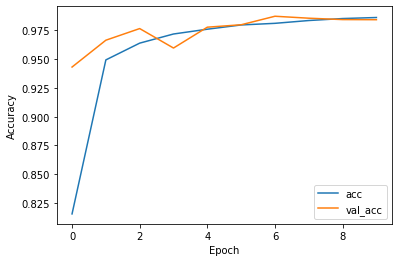

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Bidirectional RNN Architecuture

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential()
model.add(Bidirectional(LSTM(32, input_shape=(28,28))))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# (Optional) Topic 9 Functional API

## Sequential Model as Function

### MNIST data

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def nn_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [0]:
model = nn_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


### Fashion MNIST data

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
model = nn_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5091 - accuracy: 0.8178 - val_loss: 0.4220 - val_accuracy: 0.8489
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3724 - accuracy: 0.8644 - val_loss: 0.4195 - val_accuracy: 0.8495
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3366 - accuracy: 0.8766 - val_loss: 0.3754 - val_accuracy: 0.8614
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3135 - accuracy: 0.8853 - val_loss: 0.3444 - val_accuracy: 0.8755
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2987 - accuracy: 0.8895 - val_loss: 0.3561 - val_accuracy: 0.8724
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2857 - accuracy: 0.8944 - val_loss: 0.3410 - val_accuracy: 0.8773
Epoch 7/10
60000/60000 [==============================] 

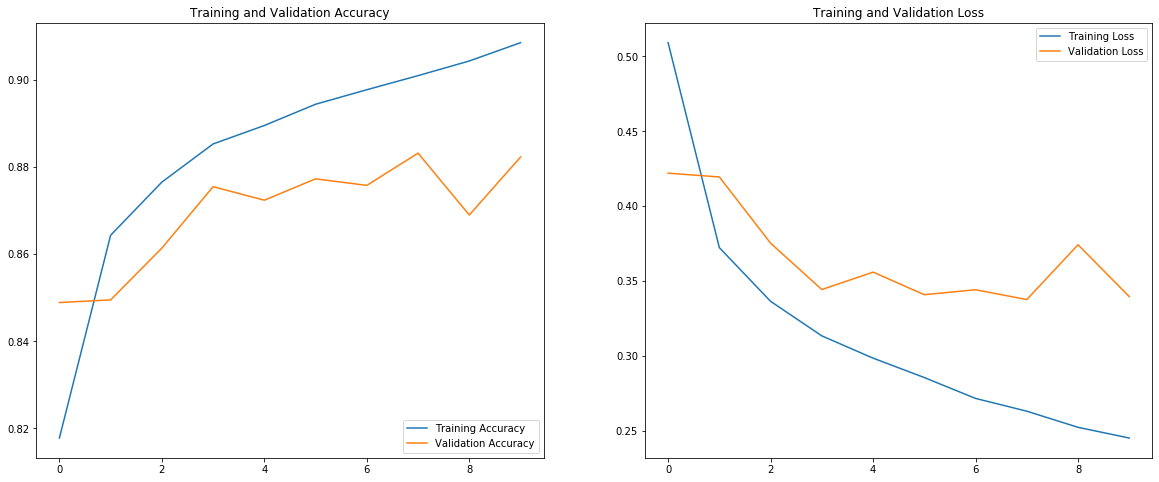

In [0]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Exercise

In [0]:
def nn_model(lr):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(lr)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

lr = [0.001,0.01,0.1]
acc=[]
for i in lr:
    model = nn_model(i)
    model.fit(x_train,y_train,verbose=0)
    loss,accuracy = model.evaluate(x_test,y_test)
    acc.append(accuracy)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

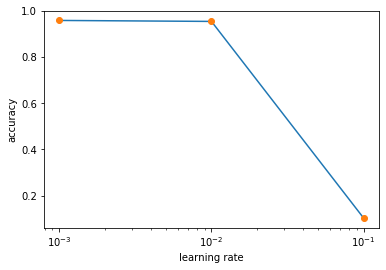

In [0]:
import matplotlib.pyplot as plt

plt.semilogx(lr,acc)
plt.semilogx(lr,acc,'o')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.show()

## Layers as Function

In [0]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [0]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_data=(x_test,y_test))
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3362 - accuracy: 0.9050 - val_loss: 0.1846 - val_accuracy: 0.9435
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1584 - accuracy: 0.9538 - val_loss: 0.1418 - val_accuracy: 0.9563
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1169 - accuracy: 0.9653 - val_loss: 0.1191 - val_accuracy: 0.9635
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0940 - accuracy: 0.9720 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0797 - accuracy: 0.9769 - val_loss: 0.1020 - val_accuracy: 0.9713
10000/1 - 1s - loss: 0.0518 - accuracy: 0.9713
Test loss: 0.10203988611618989
Test accuracy: 0.9713


In [0]:
model.save('model.h5')
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model('model.h5')

###Ensembling with Nested Models

In [0]:
from tensorflow.keras import layers

def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
keras.utils.plot_model(ensemble_model, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)


### Autoencoder

In [0]:
from tensorflow.keras import layers 
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

In [0]:
keras.utils.plot_model(autoencoder, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Toy Resnet

In [0]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

In [0]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

### Multiple Inputs and Outputs

In [0]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(shape=(None,), name='title')  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body')  # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags')  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

In [0]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

## Ex: Funcational API

In [0]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3), name='img')

x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y1 = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(16,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(x)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y2 = layers.MaxPooling2D((2,2))(x)

y3 = layers.concatenate([y1, y2])
y4 = layers.Flatten()(y3)
y5 = layers.Dense(128,activation='softmax')(y4)
outputs = layers.Dense(10,activation='softmax')(y5)

model = keras.Model(inputs, outputs, name='dual_cnn')

In [0]:
# keras.utils.plot_model(model, 'model.png')
keras.utils.plot_model(model, 'model.png', show_shapes=True)

# (Optional) Topic 10 TF.Data

### Python generator

In [0]:
def count(stop):
  i = 0
  while i<stop:
    yield i
    i += 1

In [0]:
for n in count(5):
  print(n)

0
1
2
3
4


In [0]:
it = count(5)

In [0]:
next(it)

2

### Basic Mechanics

In [0]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [0]:
for i in dataset:
  print(i)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [0]:
it = iter(dataset)

In [0]:
next(it)

<tf.Tensor: id=197, shape=(), dtype=int32, numpy=8>

In [0]:
mapped = dataset.map(lambda value: value + 2)

In [0]:
for i in mapped:
  print(i)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [0]:
dataset.reduce(0, lambda state, value: state + value)

<tf.Tensor: id=157, shape=(), dtype=int32, numpy=22>

### Dataset structure

In [0]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1

<TensorSliceDataset shapes: (10,), types: tf.float32>

In [0]:
it1 = iter(dataset1)

In [0]:
next(it1)

<tf.Tensor: id=320, shape=(10,), dtype=float32, numpy=
array([0.7425175 , 0.44699085, 0.25783074, 0.664232  , 0.2763667 ,
       0.19958127, 0.131302  , 0.8570808 , 0.9484348 , 0.644187  ],
      dtype=float32)>

In [0]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.int32)>

In [0]:
it2 = iter(dataset2)

In [0]:
next(it2)

(<tf.Tensor: id=389, shape=(), dtype=float32, numpy=0.18927693>,
 <tf.Tensor: id=390, shape=(100,), dtype=int32, numpy=
 array([93, 16, 97,  9, 95, 97, 53, 23, 83, 12, 16, 82, 50, 60, 97, 68, 25,
        30,  9, 42, 45, 11, 71, 35, 58, 10, 19, 17, 46, 46,  9, 15, 82, 90,
         7, 57, 44, 52, 33, 49, 59, 95, 59, 54, 51, 66, 95, 13, 69, 29, 55,
        14, 19, 32, 88, 67, 74, 63, 19, 77, 19, 14, 66, 88, 65,  3, 98, 50,
        16, 67, 36,  6,  6, 42,  0, 91, 10, 76, 86, 53, 89, 24,  9, 76, 31,
        29, 99,  8, 11,  0, 87, 60, 11,  7, 14,  7, 55, 97, 57, 40],
       dtype=int32)>)

In [0]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.float32, (tf.float32, tf.int32))>

In [0]:
it3 = iter(dataset3)

In [0]:
next(it3)

(<tf.Tensor: id=406, shape=(10,), dtype=float32, numpy=
 array([0.7425175 , 0.44699085, 0.25783074, 0.664232  , 0.2763667 ,
        0.19958127, 0.131302  , 0.8570808 , 0.9484348 , 0.644187  ],
       dtype=float32)>,
 (<tf.Tensor: id=407, shape=(), dtype=float32, numpy=0.18927693>,
  <tf.Tensor: id=408, shape=(100,), dtype=int32, numpy=
  array([93, 16, 97,  9, 95, 97, 53, 23, 83, 12, 16, 82, 50, 60, 97, 68, 25,
         30,  9, 42, 45, 11, 71, 35, 58, 10, 19, 17, 46, 46,  9, 15, 82, 90,
          7, 57, 44, 52, 33, 49, 59, 95, 59, 54, 51, 66, 95, 13, 69, 29, 55,
         14, 19, 32, 88, 67, 74, 63, 19, 77, 19, 14, 66, 88, 65,  3, 98, 50,
         16, 67, 36,  6,  6, 42,  0, 91, 10, 76, 86, 53, 89, 24,  9, 76, 31,
         29, 99,  8, 11,  0, 87, 60, 11,  7, 14,  7, 55, 97, 57, 40],
        dtype=int32)>))

### Demo

In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [0]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
x_train.shape

(60000, 28, 28, 1)

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
class MyModel(Model):
  
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [0]:
# Create an instance of the model
model = MyModel()

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy')

In [0]:
model.fit(x_train, y_train, epochs=5)

In [0]:
class MyModel(Model):
  
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.028334543108940125, Accuracy: 99.12999725341797, Test Loss: 0.057672739028930664, Test Accuracy: 98.23999786376953
Epoch 2, Loss: 0.011782018467783928, Accuracy: 99.59166717529297, Test Loss: 0.06344366818666458, Test Accuracy: 98.37999725341797
Epoch 3, Loss: 0.0076974364928901196, Accuracy: 99.73333740234375, Test Loss: 0.06378548592329025, Test Accuracy: 98.50999450683594
Epoch 4, Loss: 0.007346201688051224, Accuracy: 99.77999877929688, Test Loss: 0.0694119855761528, Test Accuracy: 9